In [44]:
import re
import pandas as pd

In [45]:
f = open('WhatsApp Chat with A k.txt','r', encoding= 'utf-8')

In [46]:
data = f.read()

In [7]:
# print(data)

In [48]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
# messages = re.split(pattern, data)[1:]
# messages

In [8]:
# dates = re.findall(pattern, data)
# dates

In [5]:
# df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
# df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
# df.rename(columns={'message_date': 'date'}, inplace=True)
# df.head()

In [52]:
df.shape

(2062, 2)

In [4]:
# seperate users and messages
# users = []
# messages = []
# for message in df['user_message']:
#     entry = re.split('([\w\W]+?):\s', message)
#     if entry[1:]:  # user name
#         users.append(entry[1])
#         messages.append(" ".join(entry[2:]))
#     else:
#         users.append('group_notification')
#         messages.append(entry[0])

# df['user'] = users
# df['message'] = messages
# df.drop(columns=['user_message'], inplace=True)

# df.head()

In [3]:
# df['year'] = df['date'].dt.year
# df.head()

In [2]:
# df['month'] = df['date'].dt.month_name()
# df['day'] = df['date'].dt.day
# df['hour'] = df['date'].dt.hour
# df['minute'] = df['date'].dt.minute

# df.tail()

In [1]:
# df[df['user'] == 'A k']

In [57]:
df[df['user'] == 'A k'].shape

(1150, 8)

In [58]:
words = []
for message in df['message']:
    words.extend(message.split())

In [59]:
len(words)

8394

In [60]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [61]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL demo.com as a google.com, priyansh.live, ftp://url.in .")
urls

['demo.com', 'google.com', 'priyansh.live', 'ftp://url.in']

In [62]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
    
#links

In [64]:
len(links)
# df

215

In [66]:
x = df['user'].value_counts()

In [67]:
import matplotlib.pyplot as plt

In [68]:
name = x.index
count = x.values

C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129309 missing from current font.
  font.set_text(s, 0, flags=flags)


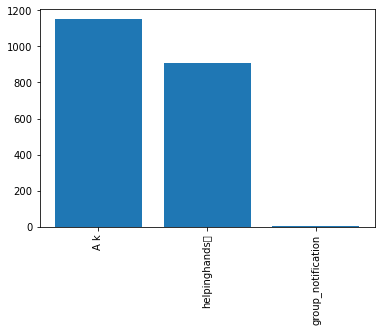

In [69]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,A k,55.77
1,helpinghands🤝,44.03
2,group_notification,0.19


In [81]:
# df['month_num'] = df['date'].dt.month
# df

In [83]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [84]:
timeline

,year,month_num,month,message
0,2020,10,October,26
1,2020,11,November,102
2,2020,12,December,201
3,2021,1,January,124
4,2021,2,February,93
5,2021,3,March,55
6,2021,4,April,78
7,2021,5,May,103
8,2021,6,June,65
9,2021,7,July,17


In [85]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" +str(timeline['year'][i]))

In [87]:
timeline['time'] = time

In [89]:
timeline

,year,month_num,month,message,time
0,2020,10,October,26,October-2020
1,2020,11,November,102,November-2020
2,2020,12,December,201,December-2020
3,2021,1,January,124,January-2021
4,2021,2,February,93,February-2021
5,2021,3,March,55,March-2021
6,2021,4,April,78,April-2021
7,2021,5,May,103,May-2021
8,2021,6,June,65,June-2021
9,2021,7,July,17,July-2021


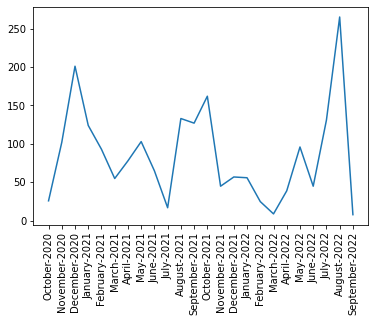

In [92]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [95]:
df['only_date'] = df['date'].dt.date

In [96]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

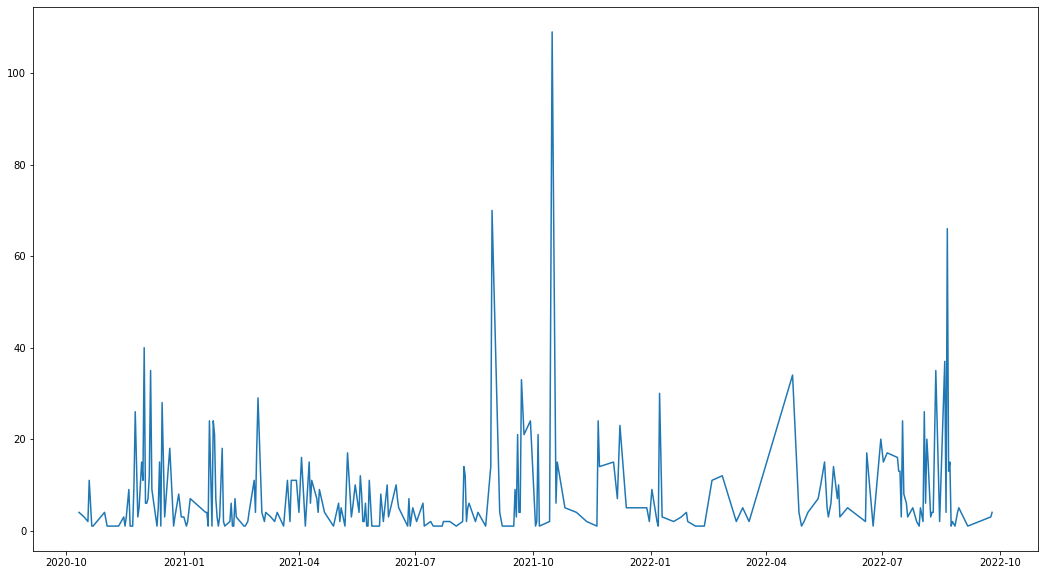

In [98]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])